In [4]:
# dummy server address: "1234abc5678def91011ghi1213.s2.eu"
serveraddress = "77de85f1ab254b9a81b50e2967d53988.s2.eu" #@param {type:"string"}
port = 8883 #@param {type:"integer"}

In [5]:
!openssl s_client -connect {serveraddress}.hivemq.cloud:{port} -showcerts < /dev/null 2> /dev/null > hivemq-output.txt


In [6]:
with open("hivemq-output.txt", "r") as f:
  txt = f.read()
print(txt)


CONNECTED(00000003)
---
Certificate chain
 0 s:CN = *.s2.eu.hivemq.cloud
   i:C = US, O = Let's Encrypt, CN = R3
-----BEGIN CERTIFICATE-----
MIIFQTCCBCmgAwIBAgISBASfh60hWOD6K+XwIZIYB7TXMA0GCSqGSIb3DQEBCwUA
MDIxCzAJBgNVBAYTAlVTMRYwFAYDVQQKEw1MZXQncyBFbmNyeXB0MQswCQYDVQQD
EwJSMzAeFw0yMzA2MDcwMTEyNTNaFw0yMzA5MDUwMTEyNTJaMB8xHTAbBgNVBAMM
FCouczIuZXUuaGl2ZW1xLmNsb3VkMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIB
CgKCAQEAxKOySSNPeWJ6cIWbmm1Psc3VmL/YK+K5NZj2GlOJJaMKopb6y0A8V7wy
YM0kaiIe4fGfdLxSKwoFrSXe8gsmaOkgdU734OweOGCPaU3W0ZjIqZzRzhpT8FY9
zj8NlpZpV/QGbbmYCOy6YfAixpZ10L9L1g74CO9M6Guf706Dfg9E1O4N5IwWQr1i
Yv1hvdr1tTHlblj0DcFVu+nYaJ0RIPsiHt3lfldphXGuw1pIEpuv61D121furZqQ
D3onWw1oQ3eUhJYUI/nKqrNSyrYDzvYckdzOnnit/lCuJqAzmFdYvEmyHvmWwS7H
GOEYKiOYjtWkrfK6siEs2pqk/zONaQIDAQABo4ICYjCCAl4wDgYDVR0PAQH/BAQD
AgWgMB0GA1UdJQQWMBQGCCsGAQUFBwMBBggrBgEFBQcDAjAMBgNVHRMBAf8EAjAA
MB0GA1UdDgQWBBRaojgg6k2PoGxKl7oJ7YO/gDASFjAfBgNVHSMEGDAWgBQULrMX
t1hWy65QCUDmH6+dixTCxjBVBggrBgEFBQcBAQRJMEcwIQYIKwYBBQUHMAGGFWh0
dHA6Ly9yMy5vLm

In [7]:

begin_str = "-----BEGIN CERTIFICATE-----"
end_str = "-----END CERTIFICATE-----"
occurrence = 1 # second
server_cert = txt.split(begin_str)[occurrence + 1].split(end_str)[0]

pem_fpath = "hivemq-com-chain.pem"
with open(pem_fpath, "w") as f:
  f.write(begin_str)
  f.write(server_cert)
  f.write(end_str)

with open(pem_fpath, "r") as f:
  print(f.read())


-----BEGIN CERTIFICATE-----
MIIFFjCCAv6gAwIBAgIRAJErCErPDBinU/bWLiWnX1owDQYJKoZIhvcNAQELBQAw
TzELMAkGA1UEBhMCVVMxKTAnBgNVBAoTIEludGVybmV0IFNlY3VyaXR5IFJlc2Vh
cmNoIEdyb3VwMRUwEwYDVQQDEwxJU1JHIFJvb3QgWDEwHhcNMjAwOTA0MDAwMDAw
WhcNMjUwOTE1MTYwMDAwWjAyMQswCQYDVQQGEwJVUzEWMBQGA1UEChMNTGV0J3Mg
RW5jcnlwdDELMAkGA1UEAxMCUjMwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEK
AoIBAQC7AhUozPaglNMPEuyNVZLD+ILxmaZ6QoinXSaqtSu5xUyxr45r+XXIo9cP
R5QUVTVXjJ6oojkZ9YI8QqlObvU7wy7bjcCwXPNZOOftz2nwWgsbvsCUJCWH+jdx
sxPnHKzhm+/b5DtFUkWWqcFTzjTIUu61ru2P3mBw4qVUq7ZtDpelQDRrK9O8Zutm
NHz6a4uPVymZ+DAXXbpyb/uBxa3Shlg9F8fnCbvxK/eG3MHacV3URuPMrSXBiLxg
Z3Vms/EY96Jc5lP/Ooi2R6X/ExjqmAl3P51T+c8B5fWmcBcUr2Ok/5mzk53cU6cG
/kiFHaFpriV1uxPMUgP17VGhi9sVAgMBAAGjggEIMIIBBDAOBgNVHQ8BAf8EBAMC
AYYwHQYDVR0lBBYwFAYIKwYBBQUHAwIGCCsGAQUFBwMBMBIGA1UdEwEB/wQIMAYB
Af8CAQAwHQYDVR0OBBYEFBQusxe3WFbLrlAJQOYfr52LFMLGMB8GA1UdIwQYMBaA
FHm0WeZ7tuXkAXOACIjIGlj26ZtuMDIGCCsGAQUFBwEBBCYwJDAiBggrBgEFBQcw
AoYWaHR0cDovL3gxLmkubGVuY3Iub3JnLzAnBgNVHR8EIDAeMBygGqAYhhZodH

In [8]:
der_fpath = "hivemq-com-chain.der"
!openssl x509 -in {pem_fpath} -out {der_fpath} -outform DER

Download hivemq-com-chain.der using the left navigation bar and upload to the microcontroller.

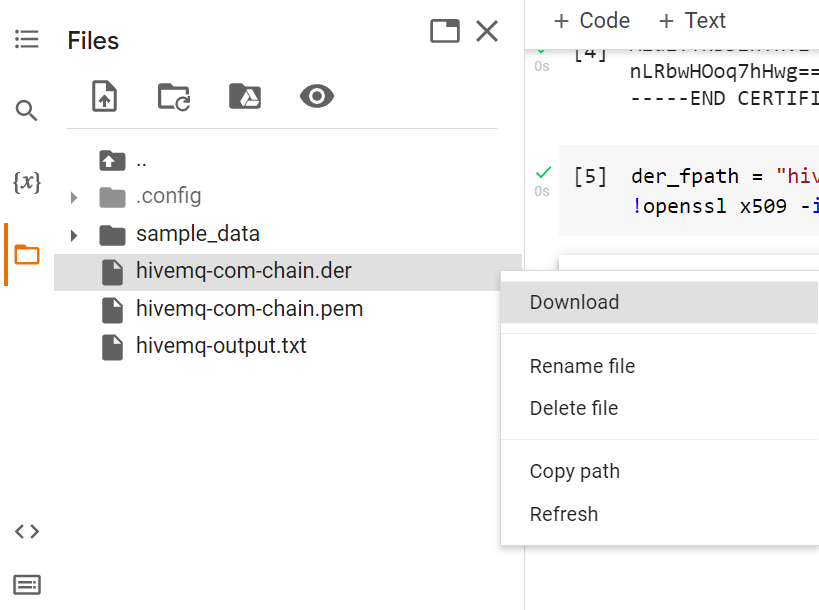

install ampy and create a folder in micropython as "certs"
then run command:
this will copy downloaded file into esp32 in port "/dev/ttyUSB0" under "certs" folder.

In [ ]:
ampy -p /dev/ttyUSB0 put hivemq-com-chain.der /cert/hivemq-com-chain.der